### Extraction database

In [39]:
import os
import zipfile
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Nom du fichier ZIP dans le même dossier que le notebook
ZIP_NAME = "GESRes_dataset.zip"

# Dossier où extraire la base
OUTPUT_DIR = "GESRes_dataset"

os.makedirs(OUTPUT_DIR, exist_ok=True)

print("📦 Extraction en cours :", ZIP_NAME)

with zipfile.ZipFile(ZIP_NAME, 'r') as zip_ref:
    zip_ref.extractall(OUTPUT_DIR)

print("🎉 Extraction terminée dans :", OUTPUT_DIR)


📦 Extraction en cours : GESRes_dataset.zip
🎉 Extraction terminée dans : GESRes_dataset


In [40]:
for root, dirs, files in os.walk("GESRes_dataset"):
    print(root, "→", len(files), "fichiers")


GESRes_dataset → 10 fichiers
GESRes_dataset/01Gesture_videos → 987 fichiers
GESRes_dataset/02Full_videos → 7 fichiers
GESRes_dataset/03Transcripts → 11 fichiers
GESRes_dataset/05Code → 14 fichiers
GESRes_dataset/05Code/02DataSetEvaluation → 6 fichiers
GESRes_dataset/05Code/02DataSetEvaluation/CrossCheckAnnotations → 9 fichiers
GESRes_dataset/05Code/01Annotations → 13 fichiers
GESRes_dataset/04Tracking_data → 2 fichiers


### Lecture d'une vidéo

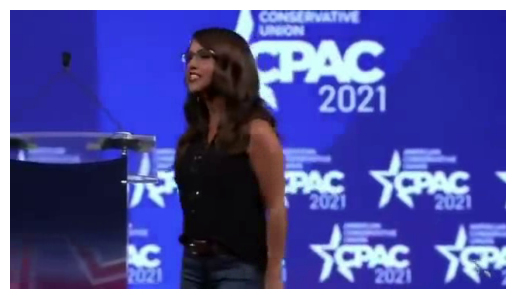

In [41]:
video_path = "GESRes_dataset/01Gesture_videos/897_Politician3_hand_flip.mp4"

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Impossible d'ouvrir la vidéo.")
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        clear_output(wait=True)
        plt.imshow(frame_rgb)
        plt.axis("off")
        plt.show()

        time.sleep(0.02)  # environ 25 fps

    cap.release()


### Recherche des différentes catégories de geste

<Axes: xlabel='type'>

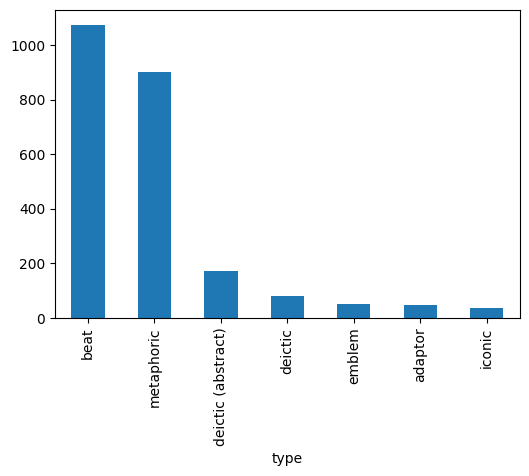

In [ ]:

csv_path = "GESRes_dataset/GESRes_dataset.csv"
df = pd.read_csv(csv_path)
df['type'].value_counts().plot(kind='bar', figsize=(6,4))


### Définition des différents gestes sociaux

In [61]:
import pandas as pd

df = pd.read_csv("GESRes_dataset/GESRes_dataset.csv")

positive_keywords = [
    # Gestes de pointage
    "point", "index", "finger", "deictic",
    
    # Gestes de salutation
    "wave", "waving", "hello", "salut", "greet",
    
    # Gestes de présentation / montrer
    "show", "present", "open hand", "palm", "hand flip",
    
    # Gestes emblématiques utiles
    "stop", "come", "wait", "ok", "thumb",
    
    # Orientation/forme de la main
    "hand", "hold", "flip", "palm",
]


negative_keywords = [
    "count", "rub", "touch", "ring", "ladder"
]

pos = df[df['lexeme'].astype(str).str.contains("|".join(positive_keywords), case=False, na=False)]

# Maintenant on filtre les gestes non pertinents
mask_negative = pos['lexeme'].astype(str).str.contains("|".join(negative_keywords), case=False, na=False)
pos_clean = pos[~mask_negative]

pos_clean[['type', 'lexeme', 'notes']].sample(20)



,type,lexeme,notes
1268,beat,hold,NaN
2124,beat,hold,NaN
1555,deictic,point (forward),NaN
43,beat,cup flip,NaN
2236,beat,hold,NaN
2098,metaphoric,hold close,NaN
2170,beat,hold,NaN
2252,beat,hold,NaN
327,metaphoric,hold up,NaN
1342,metaphoric,hand flip (forward),NaN
